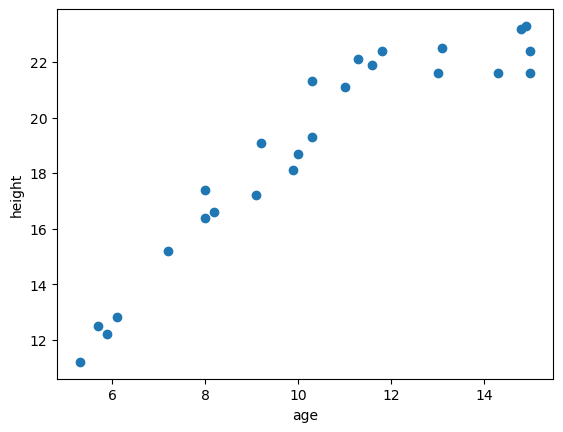

In [2]:
# 실습 1 - 제공된 데이터 파일을 불러들여 x 축은 나이, y축은 키를 나타내는 2차원 평면에각 데이터의 위치를 점으로 표시

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV 파일을 읽어 Pandas DataFrame으로 변환 
raw_data = pd.read_csv('linear_regression_data01.csv', names = ['age', 'height'])

age = raw_data['age'].to_numpy()
height = raw_data['height'].to_numpy()

plt.scatter(age, height)    # age를 x축, height를 y축으로 훈련 데이터를 점으로 표시
plt.xlabel('age')
plt.ylabel('height')

plt.show()

In [ ]:
# 실습 2 - 제공된 데이터를 모두 이용하여 최적 선형회귀를 위한 해석해 구하기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV 파일을 읽어 Pandas DataFrame으로 변환 
raw_data = pd.read_csv('linear_regression_data01.csv', names = ['age', 'height'])

# raw_data
age = raw_data['age'].to_numpy()
height = raw_data['height'].to_numpy()

# convert data
X = raw_data['age'].to_numpy()
X = np.c_[X, np.ones(len(X))]

y = raw_data['height'].to_numpy()
y = y.reshape((len(y), 1))

# X의 역행렬을 이용하여 해를 계산 
analytic_W = np.linalg.pinv(X.T @ X) @ X.T @ y

print(f"해석해 : \n {analytic_W}")

In [ ]:
# 실습 3 - 해석해로 구한 선형모델과 데이터를 한 그래프에 표시

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV 파일을 읽어 Pandas DataFrame으로 변환 
raw_data = pd.read_csv('linear_regression_data01.csv', names = ['age', 'height'])   

age = raw_data['age'].to_numpy()
height = raw_data['height'].to_numpy()

# convert data
X = raw_data['age'].to_numpy()
X = np.c_[X, np.ones(len(X))]   # 입력 데이터 X에 절편을 위한 1의 열을 추가

y = raw_data['height'].to_numpy()
y = y.reshape((len(y), 1))

# X의 역행렬을 이용하여 해를 계산
analytic_W = np.linalg.pinv(X.T @ X) @ X.T @ y

# plot
age_ = np.linspace(np.min(age), np.max(age), len(age))  # 주어진 'age' 범위에서 등간격으로 샘플을 생성
analytic_y = analytic_W[0] * age_ + analytic_W[1]    # 선형 회귀 모델을 이용하여 예측값을 계산

plt.scatter(age, height, label='Original Data') # age를 x축, height를 y축으로 훈련 데이터를 점으로 표시
plt.plot(age_, analytic_y, 'r', label='Linear Regression')  # 선형 회귀 모델을 빨간색 선으로 표시
plt.xlabel('age')
plt.ylabel('height')
plt.legend()
plt.grid()

plt.show()

In [9]:
# 실습 4 - 해석해로 구한 선형모델의 평균제곱오차(MSE) 구하기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_MSE(W,X,y):
    mse = np.zeros(len(X))  # MSE를 저장할 배열을 초기화

    # 각 데이터 포인트에 대해 MSE를 계산
    for idx in range(len(X)):
        mse[idx] = (np.dot(W.T, X[idx]) - y[idx]) ** 2  # 예측값과 실제값의 차이의 제곱을 계산
    
    mse = np.sum(mse) / len(X)   # 모든 데이터 포인트에 대한 MSE를 합하여 평균을 계산

    return mse

# CSV 파일을 읽어 Pandas DataFrame으로 변환 
raw_data = pd.read_csv('linear_regression_data01.csv', names = ['age', 'height'])

# convert data
X = raw_data['age'].to_numpy()
X = np.c_[X, np.ones(len(X))]

y = raw_data['height'].to_numpy()
y = y.reshape((len(y), 1))

# X의 역행렬을 이용하여 해를 계산
analytic_W = np.linalg.pinv(X.T @ X) @ X.T @ y

# 선형 회귀 모델의 평균제곱오차(MSE)를 계산 
mse = calculate_MSE(analytic_W, X, y)

print(f"MSE : {mse}")

MSE : 1.8631967487108962


In [ ]:
# 실습 5 - 실험적으로 최적 매개변수를 찾기 위한 경사하강법 알고라즘을 프로그램으로 작성

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def numerical_gradient(f, W, X, y):
    h = 1e-4
    grad = np.zeros_like(W) # W와 동일한 형태의 0으로 채워진 배열 생성

    for idx in range(W.size):   # W의 모든 원소에 대해 반복
        tmp_val = W[idx]     # 원래의 값 저장

        # f(W+h) 계산
        W[idx] = tmp_val+h
        fxh1 = f(W, X, y)

        # f(W-h) 계산
        W[idx] = tmp_val-h
        fxh2 = f(W, X, y)

         # 기울기 계산
        grad[idx] = (fxh1-fxh2) / (2*h)

        W[idx] = tmp_val    # 값 복원

    return grad

def calculate_MSE(W,X,Y):
    mse = np.zeros(len(X))  # MSE를 저장할 배열을 초기화

    # 각 데이터 포인트에 대해 MSE를 계산
    for idx in range(len(X)):
        mse[idx] = (np.dot(W.T, X[idx]) - y[idx]) ** 2  # 예측값과 실제값의 차이의 제곱을 계산
    
    mse = np.sum(mse) / len(X)   # 모든 데이터 포인트에 대한 MSE를 합하여 평균을 계산

    return mse

# read data
raw_data = pd.read_csv('linear_regression_data01.csv', names = ['age', 'height'])   # CSV 파일을 읽어 Pandas DataFrame으로 변환

# convert data
X = raw_data['age'].to_numpy()
X = np.c_[X, np.ones(len(X))]

y = raw_data['height'].to_numpy()
y = y.reshape((len(y), 1))

# X의 역행렬을 이용하여 해를 계산
analytic_W = np.linalg.pinv(X.T @ X) @ X.T @ y

# mse
mse = calculate_MSE(analytic_W, X, y)   # 선형 회귀 모델의 평균제곱오차(MSE)를 계산

num_epoch = 300_000 # 경사하강법을 수행할 epoch 수
eta = 1e-4   # Learning Rate
errors = [] # 각 에포크마다의 MSE를 저장할 리스트 초기화
GD_W = np.ones((2, 1))  # 경사하강법으로 찾을 가중치 초기값을 1로 설정
GD_W0_history = []  # W0의 변화를 저장할 리스트 초기화
GD_W1_history = []  # W1의 변화를 저장할 리스트 초기화

for epoch in range (num_epoch):
    mse = calculate_MSE(GD_W, X, y) # 현재 가중치로의 MSE 계산
    gradient = numerical_gradient(calculate_MSE, GD_W, X, y)    # 현재 위치에서의 기울기 계산
    GD_W = GD_W - eta * gradient    # 경사하강법으로 가중치 업데이트

    if mse < 1.7:
        print("GD를 종료합니다.")
        break

    errors.append(mse)  # 현재 에포크의 MSE를 저장
    GD_W0_history.append(GD_W[0])   # 현재 W0를 저장
    GD_W1_history.append(GD_W[1])   # 현재 W1를 저장

    if epoch % 100 == 0:
        print(f"epoch : {epoch} ===============> W : {GD_W.flatten()}, gradient : {gradient.flatten()}, mse : {mse}")

print(f"결과 GD_W : \n {GD_W}")

In [2]:
# 실습 6 - 실습 5에서 작성한 경사하강법 프로그램을 이용해 최적 매개변수 구하기 ※ 단, 학습률, 초기값, 반복 회수는 임의로 정하여 사용

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def numerical_gradient(f, W, X, y):
    h = 1e-4
    grad = np.zeros_like(W) # W와 동일한 형태의 0으로 채워진 배열 생성

    for idx in range(W.size):   # W의 모든 원소에 대해 반복
        tmp_val = W[idx]     # 원래의 값 저장

        # f(W+h) 계산
        W[idx] = tmp_val+h
        fxh1 = f(W, X, y)

        # f(W-h) 계산
        W[idx] = tmp_val-h
        fxh2 = f(W, X, y)

         # 기울기 계산
        grad[idx] = (fxh1-fxh2) / (2*h)

        W[idx] = tmp_val    # 값 복원

    return grad

def calculate_MSE(W,X,Y):
    mse = np.zeros(len(X))  # MSE를 저장할 배열을 초기화

    # 각 데이터 포인트에 대해 MSE를 계산
    for idx in range(len(X)):
        mse[idx] = (np.dot(W.T, X[idx]) - y[idx]) ** 2  # 예측값과 실제값의 차이의 제곱을 계산
    
    mse = np.sum(mse) / len(X)   # 모든 데이터 포인트에 대한 MSE를 합하여 평균을 계산

    return mse

# read data
raw_data = pd.read_csv('linear_regression_data01.csv', names = ['age', 'height'])   # CSV 파일을 읽어 Pandas DataFrame으로 변환


# convert data
X = raw_data['age'].to_numpy()
X = np.c_[X, np.ones(len(X))]

y = raw_data['height'].to_numpy()
y = y.reshape((len(y), 1))

# X의 역행렬을 이용하여 해를 계산
analytic_W = np.linalg.pinv(X.T @ X) @ X.T @ y

# mse
mse = calculate_MSE(analytic_W, X, y)   # 선형 회귀 모델의 평균제곱오차(MSE)를 계산

num_epoch = 300_000 # 경사하강법을 수행할 epoch 수
eta = 1e-4   # Learning Rate
errors = [] # 각 에포크마다의 MSE를 저장할 리스트 초기화

# GD
GD_W = np.ones((2, 1))  # 경사하강법으로 찾을 가중치 초기값 설정
GD_W[0] = np.random.uniform(low=0, high=10.0)   # 경사하강법으로 찾을 GD_W[0] 가중치를 무작위하게 설정
GD_W[1] = np.random.uniform(low=0, high=10.0)   # 경사하강법으로 찾을 GD_W[1] 가중치를 무작위하게 설정

print(f"랜덤하게 초기화한 가중치 값 : \n {GD_W}")

GD_W0_history = []  # W0의 변화를 저장할 리스트 초기화
GD_W1_history = []  # W1의 변화를 저장할 리스트 초기화

for epoch in range (num_epoch):
    mse = calculate_MSE(GD_W, X, y) # 현재 가중치로의 MSE 계산
    gradient = numerical_gradient(calculate_MSE, GD_W, X, y)    # 현재 위치에서의 기울기 계산
    GD_W = GD_W - eta * gradient    # 경사하강법으로 가중치 업데이트

    if mse < 1.7:
        print("GD를 종료합니다.")
        break

    errors.append(mse)  # 현재 에포크의 MSE를 저장
    GD_W0_history.append(GD_W[0])   # 현재 W0를 저장
    GD_W1_history.append(GD_W[1])   # 현재 W1를 저장

    if epoch % 100 == 0:
        print(f"epoch : {epoch} ===============> W : {GD_W.flatten()}, gradient : {gradient.flatten()}, mse : {mse}")

print(f"결과 GD_W : \n {GD_W}")


랜덤하게 초기화한 가중치 값 : 
 [[7.82582375]
 [7.98813127]]
epoch : 0 ===============> W : [7.74686187 7.9811117 ], gradient : [789.61883278  70.19571532], mse : 5347.393794434495
epoch : 100 ===============> W : [3.14350366 7.57182747], gradient : [242.01269729  21.52345287], mse : 504.00029281035734
epoch : 200 ===============> W : [1.73260958 7.44629549], gradient : [74.17466678  6.60568621], mse : 49.03018114703013
epoch : 300 ===============> W : [1.3001868  7.40773196], gradient : [22.73330697  2.03347222], mse : 6.294459223077481
epoch : 400 ===============> W : [1.16765966 7.39582382], gradient : [6.96683606 0.63210875], mse : 2.2810073785296354
epoch : 500 ===============> W : [1.12704875 7.39208546], gradient : [2.1345069  0.20259214], mse : 1.904318944042347
epoch : 600 ===============> W : [1.11460962 7.39085117], gradient : [0.65342731 0.07094084], mse : 1.869032257044366
epoch : 700 ===============> W : [1.11080496 7.39038442], gradient : [0.19948583 0.0305835 ], mse : 1.86574565279

epoch : 0 ===============> W : [1.00789314 1.00075079], gradient : [-78.93136808  -7.50795   ], mse : 58.3764
epoch : 100 ===============> W : [1.46787064 1.04655631], gradient : [-24.16191767  -2.63954961], mse : 9.915986733798762
epoch : 200 ===============> W : [1.60855035 1.06397816], gradient : [-7.37542991 -1.14714591], mse : 5.358183112299426
epoch : 300 ===============> W : [1.65136742 1.07269789], gradient : [-2.23049481 -0.68946539], mse : 4.925338242773731
epoch : 400 ===============> W : [1.66419041 1.07874781], gradient : [-0.65362651 -0.54892159], mse : 4.880238837926436
epoch : 500 ===============> W : [1.66782063 1.08397677], gradient : [-0.17034948 -0.50557853], mse : 4.871645863729693
epoch : 600 ===============> W : [1.66863356 1.08895144], gradient : [-0.02225167 -0.49202712], mse : 4.866512177666314
epoch : 700 ===============> W : [1.66858325 1.0938455 ], gradient : [ 0.02311572 -0.4876069 ], mse : 4.861717359802475
epoch : 800 ===============> W : [1.66826859 1.0

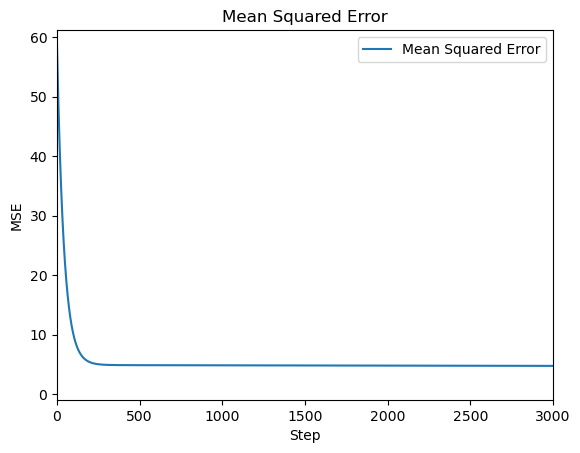

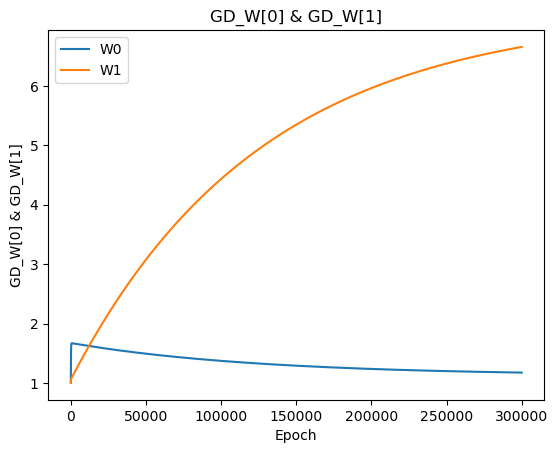

In [1]:
# 실습 7 - 경사하강법의 반복 회수에 따른 평균제곱오차, 매개변수의 값을 그래프로 표시

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def numerical_gradient(f, W, X, y):
    h = 1e-4
    grad = np.zeros_like(W) # W와 동일한 형태의 0으로 채워진 배열 생성

    for idx in range(W.size):   # W의 모든 원소에 대해 반복
        tmp_val = W[idx]     # 원래의 값 저장

        # f(W+h) 계산
        W[idx] = tmp_val+h
        fxh1 = f(W, X, y)

        # f(W-h) 계산
        W[idx] = tmp_val-h
        fxh2 = f(W, X, y)

         # 기울기 계산
        grad[idx] = (fxh1-fxh2) / (2*h)

        W[idx] = tmp_val    # 값 복원

    return grad

def calculate_MSE(W,X,Y):
    mse = np.zeros(len(X))  # MSE를 저장할 배열을 초기화

    # 각 데이터 포인트에 대해 MSE를 계산
    for idx in range(len(X)):
        mse[idx] = (np.dot(W.T, X[idx]) - y[idx]) ** 2  # 예측값과 실제값의 차이의 제곱을 계산
    
    mse = np.sum(mse) / len(X)   # 모든 데이터 포인트에 대한 MSE를 합하여 평균을 계산

    return mse

# read data
raw_data = pd.read_csv('linear_regression_data01.csv', names = ['age', 'height'])   # CSV 파일을 읽어 Pandas DataFrame으로 변환

# convert data
X = raw_data['age'].to_numpy()
X = np.c_[X, np.ones(len(X))]

y = raw_data['height'].to_numpy()
y = y.reshape((len(y), 1))


# X의 역행렬을 이용하여 해를 계산
analytic_W = np.linalg.pinv(X.T @ X) @ X.T @ y

# mse
mse = calculate_MSE(analytic_W, X, y)   # 선형 회귀 모델의 평균제곱오차(MSE)를 계산

num_epoch = 300_000 # 경사하강법을 수행할 epoch 수
eta = 1e-4   # Learning Rate
errors = [] # 각 에포크마다의 MSE를 저장할 리스트 초기화

GD_W = np.ones((2, 1))  # 경사하강법으로 찾을 가중치 초기값 설정
GD_W0_history = []  # W0의 변화를 저장할 리스트 초기화
GD_W1_history = []  # W1의 변화를 저장할 리스트 초기화

for epoch in range (num_epoch):
    mse = calculate_MSE(GD_W, X, y) # 현재 가중치로의 MSE 계산
    gradient = numerical_gradient(calculate_MSE, GD_W, X, y)    # 현재 위치에서의 기울기 계산
    GD_W = GD_W - eta * gradient    # 경사하강법으로 가중치 업데이트

    if mse < 1.7:
        print("GD를 종료합니다.")
        break

    errors.append(mse)  # 현재 에포크의 MSE를 저장
    GD_W0_history.append(GD_W[0])   # 현재 W0를 저장
    GD_W1_history.append(GD_W[1])   # 현재 W1를 저장

    if epoch % 100 == 0:
        print(f"epoch : {epoch} ===============> W : {GD_W.flatten()}, gradient : {gradient.flatten()}, mse : {mse}")

print(f"결과 GD_W : \n {GD_W}")

# Plot mean squared error (MSE)
plt.plot(errors, label='Mean Squared Error')
plt.xlim(0,3000)
plt.xlabel('Step')
plt.ylabel('MSE')
plt.title('Mean Squared Error')
plt.legend()
plt.show()

# Plot GD_W0_history & GD_W1_history
plt.plot(GD_W0_history, label='W0'); plt.plot(GD_W1_history, label='W1')
plt.xlabel('Epoch')
plt.ylabel('GD_W[0] & GD_W[1]')
plt.title('GD_W[0] & GD_W[1]')
plt.legend()
plt.show()

In [ ]:
# 실습 8 - 훈련 데이터, 해석해를 이용해 구한 회귀모델, 경사하강법을 이용해 구한 회귀모델을 하나의 그래프로 표시

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def numerical_gradient(f, W, X, y):
    h = 1e-4
    grad = np.zeros_like(W) # W와 동일한 형태의 0으로 채워진 배열 생성

    for idx in range(W.size):   # W의 모든 원소에 대해 반복
        tmp_val = W[idx]     # 원래의 값 저장

        # f(W+h) 계산
        W[idx] = tmp_val+h
        fxh1 = f(W, X, y)

        # f(W-h) 계산
        W[idx] = tmp_val-h
        fxh2 = f(W, X, y)

         # 기울기 계산
        grad[idx] = (fxh1-fxh2) / (2*h)

        W[idx] = tmp_val    # 값 복원

    return grad

def calculate_MSE(W,X,Y):
    mse = np.zeros(len(X))  # MSE를 저장할 배열을 초기화

    # 각 데이터 포인트에 대해 MSE를 계산
    for idx in range(len(X)):
        mse[idx] = (np.dot(W.T, X[idx]) - y[idx]) ** 2  # 예측값과 실제값의 차이의 제곱을 계산
    
    mse = np.sum(mse) / len(X)   # 모든 데이터 포인트에 대한 MSE를 합하여 평균을 계산

    return mse

# read data
raw_data = pd.read_csv('linear_regression_data01.csv', names = ['age', 'height'])   # CSV 파일을 읽어 Pandas DataFrame으로 변환

# raw_data
age = raw_data['age'].to_numpy()
height = raw_data['height'].to_numpy()

# convert data
X = raw_data['age'].to_numpy()
X = np.c_[X, np.ones(len(X))]

y = raw_data['height'].to_numpy()
y = y.reshape((len(y), 1))

# X의 역행렬을 이용하여 해를 계산
analytic_W = np.linalg.pinv(X.T @ X) @ X.T @ y

# mse
mse = calculate_MSE(analytic_W, X, y)   # 선형 회귀 모델의 평균제곱오차(MSE)를 계산

num_epoch = 300_000 # 경사하강법을 수행할 epoch 수
eta = 1e-4   # Learning Rate
errors = [] # 각 에포크마다의 MSE를 저장할 리스트 초기화

GD_W = np.ones((2, 1))  # 경사하강법으로 찾을 가중치 초기값 설정
GD_W0_history = []  # W0의 변화를 저장할 리스트 초기화
GD_W1_history = []  # W1의 변화를 저장할 리스트 초기화

for epoch in range (num_epoch):
    mse = calculate_MSE(GD_W, X, y) # 현재 가중치로의 MSE 계산
    gradient = numerical_gradient(calculate_MSE, GD_W, X, y)    # 현재 위치에서의 기울기 계산
    GD_W = GD_W - eta * gradient    # 경사하강법으로 가중치 업데이트

    if mse < 1.7:
        print("GD를 종료합니다.")
        break

    errors.append(mse)  # 현재 에포크의 MSE를 저장
    GD_W0_history.append(GD_W[0])   # 현재 W0를 저장
    GD_W1_history.append(GD_W[1])   # 현재 W1를 저장

    if epoch % 100 == 0:
        print(f"epoch : {epoch} ===============> W : {GD_W.flatten()}, gradient : {gradient.flatten()}, mse : {mse}")

print(f"결과 GD_W : \n {GD_W}")
    
# plot
age_ = np.linspace(np.min(age), np.max(age), len(age))  # 배열을 생성하여 예측을 위한 age_값을 설정
analytic_y = analytic_W[0] * age_ + analytic_W[1]   # 배열을 생성하여 해석해로 학습된 모델의 예측값을 계산
analytic_GD = GD_W0_history[-1] * age_ + GD_W1_history[-1]  # 배열을 생성하여 경사하강법으로 학습된 모델의 예측값을 계산

plt.scatter(age, height, label='Original Data')
plt.plot(age_, analytic_y, 'r', label='Linear Regression')  
plt.plot(age_, analytic_GD, 'g', label='Linear Regression-GD')
plt.xlabel('age')
plt.ylabel('height')
plt.legend()
plt.grid()
plt.show()